In [226]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

import pickle
from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)



In [227]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"
condition = "binary_condition"


In [228]:
df_train = pd.read_csv(f"{path_dataframes}/df_train.csv")
# df_test = pd.read_csv("/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/df_test.csv")




df_labels = pd.read_csv(f"{path_dataframes}/df_labels_train.csv")

In [229]:
df_train

,Unnamed: 0,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,...,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0,0.151379,0.404716,0.908139,0.989111,0.990348,0.070910,0.835385,0.002855,0.997566,...,0.957028,0.500515,0.793864,0.742221,0.587077,0.764873,0.173932,0.014342,0.535152,0.113235
1,1,0.151707,0.386983,0.957102,0.970816,0.974082,0.103330,0.856063,0.002856,0.999072,...,0.970137,0.496295,0.762330,0.741918,0.572730,0.764588,0.177174,0.014171,0.534254,0.159739
2,2,0.152334,0.385712,0.908687,0.942070,0.948400,0.227248,0.884633,0.002595,0.997855,...,0.979246,0.492228,0.765295,0.752047,0.614115,0.774074,0.180487,0.014027,0.516265,0.047297
3,3,0.152786,0.384052,0.937148,0.964525,0.968475,0.163223,0.884439,0.002830,0.995734,...,0.969917,0.492075,0.775176,0.751956,0.622608,0.773988,0.181395,0.014103,0.509841,0.081392
4,4,0.152716,0.382267,0.961120,0.975974,0.978674,0.144362,0.873784,0.003023,0.996313,...,0.974559,0.490276,0.792718,0.745000,0.595336,0.767477,0.194015,0.014159,0.505803,0.088930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,0.339054,1.000000,0.205255,0.504254,0.536422,0.048881,0.598945,0.005946,0.585004,...,0.245719,1.000000,0.593336,1.000000,1.000000,1.000000,0.259250,0.087961,0.687747,0.361840
173,173,0.824787,0.697196,0.719323,0.781425,0.801969,0.509144,0.428516,0.880071,0.583065,...,0.138386,0.717433,0.569406,0.647391,0.448477,0.675020,0.221795,0.040686,0.730663,0.504753
174,174,0.301860,0.438246,0.344787,0.577233,0.608061,0.772911,0.737837,0.592579,0.531799,...,0.024519,0.362797,0.000000,0.576285,0.348801,0.606348,0.218800,0.026831,0.561968,0.464898
175,175,0.402989,0.000000,0.204130,0.497790,0.530013,1.000000,0.636050,0.440788,0.500953,...,0.139861,0.000000,0.127847,0.569685,0.239404,0.599916,0.219502,0.024886,0.000000,0.355554


In [230]:
df_labels

,Unnamed: 0,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [231]:
df_train = df_train.drop(columns="Unnamed: 0")


In [232]:
df_labels[condition] 

0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: binary_condition, Length: 177, dtype: int64

In [233]:
df_train

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.151379,0.404716,0.908139,0.989111,0.990348,0.070910,0.835385,0.002855,0.997566,0.997881,0.957028,0.500515,0.793864,0.742221,0.587077,0.764873,0.173932,0.014342,0.535152,0.113235
1,0.151707,0.386983,0.957102,0.970816,0.974082,0.103330,0.856063,0.002856,0.999072,0.999192,0.970137,0.496295,0.762330,0.741918,0.572730,0.764588,0.177174,0.014171,0.534254,0.159739
2,0.152334,0.385712,0.908687,0.942070,0.948400,0.227248,0.884633,0.002595,0.997855,0.998132,0.979246,0.492228,0.765295,0.752047,0.614115,0.774074,0.180487,0.014027,0.516265,0.047297
3,0.152786,0.384052,0.937148,0.964525,0.968475,0.163223,0.884439,0.002830,0.995734,0.996284,0.969917,0.492075,0.775176,0.751956,0.622608,0.773988,0.181395,0.014103,0.509841,0.081392
4,0.152716,0.382267,0.961120,0.975974,0.978674,0.144362,0.873784,0.003023,0.996313,0.996789,0.974559,0.490276,0.792718,0.745000,0.595336,0.767477,0.194015,0.014159,0.505803,0.088930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.339054,1.000000,0.205255,0.504254,0.536422,0.048881,0.598945,0.005946,0.585004,0.620029,0.245719,1.000000,0.593336,1.000000,1.000000,1.000000,0.259250,0.087961,0.687747,0.361840
173,0.824787,0.697196,0.719323,0.781425,0.801969,0.509144,0.428516,0.880071,0.583065,0.618157,0.138386,0.717433,0.569406,0.647391,0.448477,0.675020,0.221795,0.040686,0.730663,0.504753
174,0.301860,0.438246,0.344787,0.577233,0.608061,0.772911,0.737837,0.592579,0.531799,0.568273,0.024519,0.362797,0.000000,0.576285,0.348801,0.606348,0.218800,0.026831,0.561968,0.464898
175,0.402989,0.000000,0.204130,0.497790,0.530013,1.000000,0.636050,0.440788,0.500953,0.537907,0.139861,0.000000,0.127847,0.569685,0.239404,0.599916,0.219502,0.024886,0.000000,0.355554


In [234]:
if df_train.isna().any().any():
    print("Sono presenti valori NaN nel DataFrame.")
else:
    print("Non sono presenti valori NaN nel DataFrame.")

Non sono presenti valori NaN nel DataFrame.


In [235]:
df_labels[condition]

0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: binary_condition, Length: 177, dtype: int64

In [236]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels[condition], test_size=0.33, random_state=42)


In [237]:
X_train.columns

Index(['P1_min', 'P5_HarmonicAmplitudeRatio', 'P5_rms', 'P5_variance',
       'P5_std', 'P1_median', 'P1_clearance_factor', 'P5_min', 'P1_variance',
       'P1_std', 'P1_rms', 'P1_HarmonicAmplitudeRatio', 'P2_75th_percentile',
       'P2_variance', 'P2_rms', 'P2_std', 'P5_25th_percentile', 'P2_min',
       'P6_HarmonicAmplitudeRatio', 'P5_fft_25th_percentile'],
      dtype='object')

In [238]:
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None,2,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6,8]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Migliori parametri:", best_params)
print("Miglior punteggio:", best_score)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Migliori parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Miglior punteggio: 0.957905982905983
Accuracy: 0.9830508474576272

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        25

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59


Confusion Matrix:
[[34  0]
 [ 1 24]]


In [239]:
df_test = pd.read_csv(f"{path_dataframes}/df_test.csv")




In [240]:
df_test = df_test.drop(columns="Unnamed: 0")


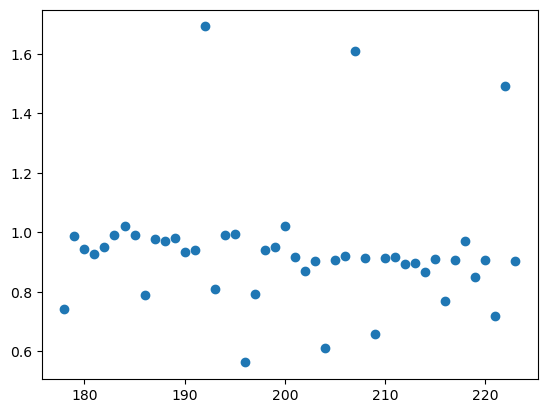

In [258]:
plt.scatter(df_test.index,df_test["P5_variance"])

In [242]:
pred = best_rf_model.predict(df_test)

In [243]:
new_index_values = range(178, 224)
df_test.reset_index(drop=True, inplace=True)
df_test.index = new_index_values

In [244]:
df_test["pred"] = pred

In [245]:
df_pred_1 = df_test.loc[df_test['pred'] == 1]

In [246]:
df_pred_1

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,...,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile,pred
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,...,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748,1
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,...,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881,1
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,...,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822,1
184,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,...,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636,1
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,...,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762,1
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,...,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896,1
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,...,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207,1
192,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,...,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197,1
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,...,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972,1
196,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,...,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031,1


In [247]:
# with open(f'/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/models/rf_anomaly_classifier.pkl', 'wb') as file:
#     pickle.dump(best_rf_model, file)

In [248]:
# # Carica il modello da un file
# with open('random_forest_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Utilizzo del modello per fare predizioni
# predictions = model.predict(X_test)


In [249]:
anomalia_indices = np.where(y_pred == 1)
print(anomalia_indices)
X_test_df = pd.DataFrame(X_test)

X_anomaly = X_test_df.iloc[anomalia_indices]





(array([ 2,  6,  7,  8,  9, 11, 13, 15, 16, 19, 23, 24, 25, 26, 31, 32, 36,
       37, 39, 41, 44, 47, 48, 53]),)


In [250]:
X_anomaly.index.values

array([139, 119, 173, 109, 140, 161, 118, 111, 113, 114, 168, 170, 150,
       117, 127, 144, 156, 136, 158, 108, 142, 122, 153, 152])

In [251]:
selected_rows = df_labels.loc[df_labels['Condition'].isin([2, 3])]
print(selected_rows.index)
df_labels_anomaly = df_labels.iloc[selected_rows.index.values]
df_anomaly = df_train.iloc[selected_rows.index.values]

Index([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176],
      dtype='int64')


In [255]:
df_labels_anomaly

,Unnamed: 0,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
105,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
106,106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
107,107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
108,108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
109,109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [256]:
df_pred_1.to_csv(f"{path_dataframes}/df_anomaly.csv")
df_labels_anomaly.to_csv(f"{path_dataframes}/df_anomaly_labels.csv")

In [259]:
df_labels_anomaly

,Unnamed: 0,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
105,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
106,106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
107,107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
108,108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
109,109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1
